# JEDI - Machine Leaning Workshop

## Aprendizado Supervisionado: Classificação

### Sobre as bibliotecas e os dados

In [21]:
# Por convenção, as bibliotecas utilizadas devem ser importadas no início do notebook/programa
# Aqui importamos apenas algumas delas, as de uso geral.
# De modo a contextualizar com nossas tarefas, outras seram carregadas ao longo do programa 

# https://numpy.org/doc/stable/user/whatisnumpy.html
# https://pandas.pydata.org/docs/user_guide/index.html#user-guide
# https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

Para a implementação do modelo de classificação utilizaremos os dados do da base [*breast cancer*](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) disponibilizada através da bilioteca de Machine Learning [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html).

A tabela contém métricas extraídas a partir do processamento de imagens do tecido afetado pelo tumor e o resectivo parecer da análise médica: *malignno* ou *benígno*

In [22]:
# Do módulo de datasets importa a função que carrega a base de dados breast cancer
from sklearn.datasets import load_breast_cancer

# Carrega a base de dados
breast_cancer = load_breast_cancer()

In [23]:
# Imprime as informações sobre a base de dados
print(breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [24]:
# TAREFA
# Transforme o dicionário com os dados de cancêr de mama em um DataFrame
df = pd.DataFrame(breast_cancer['data'], columns=breast_cancer['feature_names'])
df['target'] = breast_cancer['target']
nome_dos_alvos = breast_cancer['target_names']

In [25]:
# Quais são os tipos das colunas?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [26]:
# Há algum campo vazio no dataset?
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [27]:
# Quantos dados temos para cada classe?
df['target'].map({0: nome_dos_alvos[0], 1: nome_dos_alvos[1]}).value_counts()

benign       357
malignant    212
Name: target, dtype: int64

In [28]:
# Qual a proporção entre classes?
df['target'].map({0: nome_dos_alvos[0], 1: nome_dos_alvos[1]}).value_counts()/len(df)

benign       0.627417
malignant    0.372583
Name: target, dtype: float64

### Sobre a preparação dos dados

O primeiro passo é separar o que são os atributos e o que é o alvo do modelo.

In [29]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [30]:
X = df.drop(columns='target') # Todas as colunas do dataframe com exceção do target
y = df['target'] # Apenas a coluna target

Em seguida temos de separar o que é o conjunto teste e o que é o conjunto treino 

In [31]:
# Do módulo de model_selection da scikit-learn importa o método train_test_split
# Dados os atributos (X) e o alvo (y), o método train_test_split os separa em conjuntos treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

### Sobre o modelo de classificação

Para efetuarmos a tarefa de medição utilizaremos o modelo de [Árvore de Decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) do Scikit-Learn.

In [32]:
# Do módulo tree importa o modelo DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=8, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=8, random_state=0)

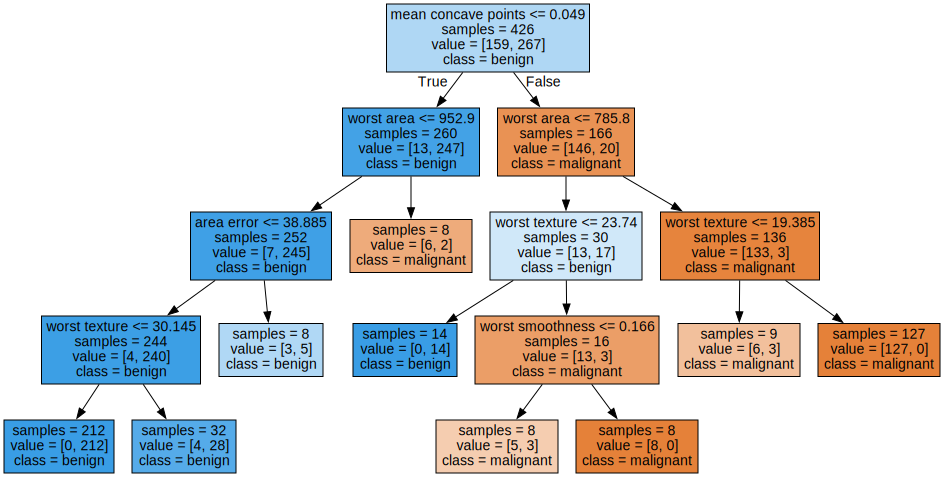

In [33]:
# Importa a função plot_decision_tree do script py_utilities
from py_utilities import plot_decision_tree

plot_decision_tree(clf, X.columns, nome_dos_alvos)

### Sobre a avaliação do modelo

A forma mais imediata de avaliação se dá através do método [*score*](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.score) do classificador, que calculará a acurácia média dados os inputs X e y. 

In [34]:
print(f'Resultados do modelo: {clf.__str__()}\n')
print(f'\tPerformance nos dados de treino: {clf.score(X_train, y_train):.2f}')
print(f'\tPerformance nos dados de teste : {clf.score(X_test, y_test):.2f}')

Resultados do modelo: DecisionTreeClassifier(max_depth=4, min_samples_leaf=8, random_state=0)

	Performance nos dados de treino: 0.96
	Performance nos dados de teste : 0.94


Outra possibilidade é utilizarmos o [classafication_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), que nos dará uma visão geral da performance do modelo segmentado pelas classes alvo (malígno ou benígno).

In [35]:
# Do módulo métricas importa a função classification_report 
from sklearn.metrics import classification_report

# Queremos comparar o valor predito pelo modelo com o valor verdadeiro
y_verdadeiro = y_test
y_predito = clf.predict(X_test)

print(f'Relatório do modelo de classificação {clf.__str__()}\n')
print(classification_report(y_verdadeiro, y_predito, target_names=nome_dos_alvos))

Relatório do modelo de classificação DecisionTreeClassifier(max_depth=4, min_samples_leaf=8, random_state=0)

              precision    recall  f1-score   support

   malignant       0.87      0.98      0.92        53
      benign       0.99      0.91      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.95      0.93       143
weighted avg       0.94      0.94      0.94       143



E por fim, uma outra forma de verificarmos o desempenho do nosso classificador é a [matriz de confusão](https://pt.wikipedia.org/wiki/Matriz_de_confus%C3%A3o).

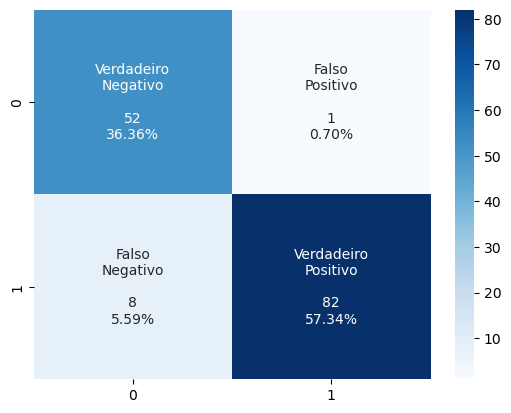

In [36]:
# Do módulo metric importa a função confusion_matrix
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_verdadeiro, y_predito)

# Plot da matriz de confusão
# Cógido adaptado de https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

group_names = ['Verdadeiro\nNegativo\n', 'Falso\nPositivo\n', 'Falso\nNegativo\n', 'Verdadeiro\nPositivo\n']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

### Sobre a complexidade do modelo

In [37]:
# Do módulo metrics importa a métrica f1_score
from sklearn.metrics import f1_score

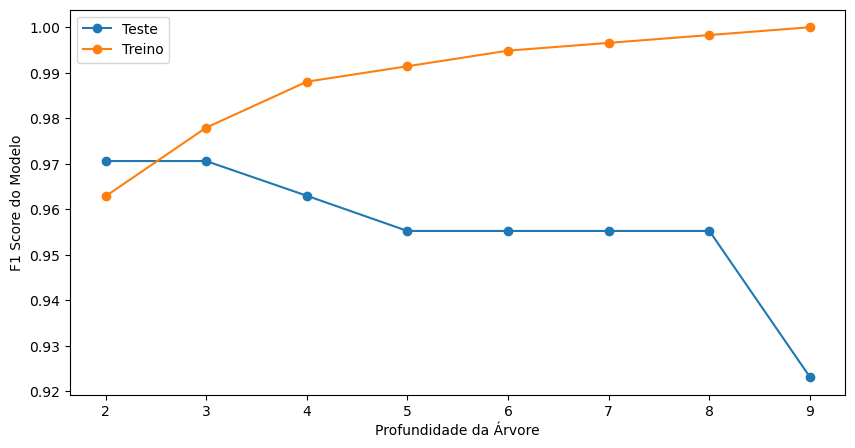

In [41]:
max_depth_list = [2, 3, 4, 5, 6, 7, 8, 9]

train_results = []
test_results = []

for depth in max_depth_list:
    clf = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=1, random_state=0)
    clf.fit(X_train, y_train)
    
    score_treino = f1_score(y_train, clf.predict(X_train))
    score_teste = f1_score(y_test, clf.predict(X_test))
    
    train_results.append(score_treino)
    test_results.append(score_teste)
    

plt.figure(figsize=(10, 5))

plt.plot(max_depth_list, test_results, '-o', label='Teste')
plt.plot(max_depth_list, train_results, '-o', label='Treino')

plt.xlabel('Profundidade da Árvore')
plt.ylabel('F1 Score do Modelo')

plt.legend()
plt.show()

## Extra